In [437]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, GroupShuffleSplit,RandomizedSearchCV
from xgboost import XGBClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from datetime import datetime
from catboost import Pool

#Timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken for Modeling: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [438]:
train_1 = pd.read_csv('Train.csv')
test_1 = pd.read_csv('Test.csv')
train = train_1.copy()
test = test_1.copy()

In [439]:
train.shape

(620, 29)

In [440]:
delete = ['f23','f24','f25','f26','f27']
for i in delete:
    del train[i]

In [441]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f14,f15,f16,f17,f18,f19,f20,f21,f22,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,1.459782,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.172917,0.098853,-3.237512,0.040193,0.182574,0.085505,0.233285,0.925358,-0.008030,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,-0.573268,2


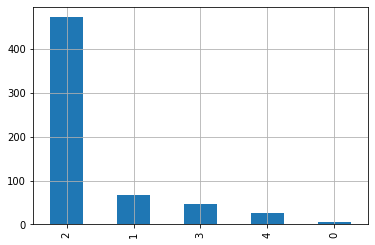

In [442]:
train.grade.value_counts().plot(kind='bar')

In [443]:
train.grade.value_counts()

2    472
1     68
3     47
4     27
0      6
Name: grade, dtype: int64

## Resampling

In [444]:
from sklearn.utils import resample
y = train.grade
X = train.drop(['grade'],axis=1)

In [445]:
# add = 0
# X['Sum']=0
# X['Min']=0
# X['Max']=0
# X['Mean']=0
# Min=[]
# Max=[]
# X['Sum'] = X['Sum'].astype(float)
# X['Min'] = X['Min'].astype(float)
# X['Max'] = X['Max'].astype(float)
# X['Mean'] = X['Mean'].astype(float)
# li = X.columns.to_list()
# for i in range(len(X['f1'])):
#     add=0
#     Min.clear()
#     Max.clear()
#     for j in li:
#         add+=X[j][i]
#         Min.append(X[j][i])
#         Max.append(X[j][i])
#     X['Sum'][i] = add
#     X['Min'][i] = min(Min)
#     X['Max'][i] = max(Max)
#     X['Mean'][i] = add/23

In [446]:
from sklearn.decomposition import PCA
pca=PCA()
temp_df = X.copy()
temp_df = pca.fit_transform(temp_df)
variance=pca.explained_variance_ratio_

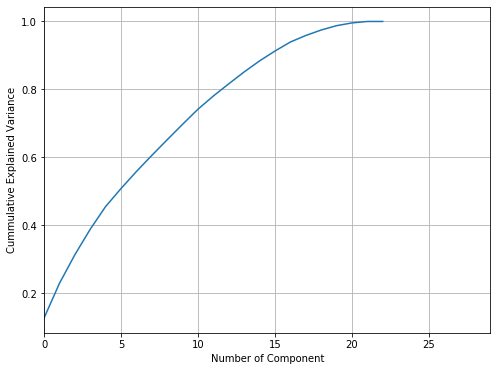

In [447]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,29,1)
plt.xlabel('Number of Component')
plt.ylabel('Cummulative Explained Variance')
plt.show()
x=np.cumsum(pca.explained_variance_ratio_)

In [448]:
x[15]

0.9128619888827054

In [449]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=27)

In [450]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,1.459782
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,-2.118189,0.172917,0.098853,-3.237512,0.040193,0.182574,0.085505,0.233285,0.925358,-0.008030
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,-2.118189,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,-0.573268


In [451]:
mino = X_train[train.grade==0]
majo = X_train[train.grade!=0]

/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [452]:
mino_upsampled = resample(mino,
                          replace=True, # sample with replacement
                          n_samples=10, # match number in majority class
                          random_state=27) # reproducible results

In [453]:
X_train = pd.concat([majo,mino_upsampled])
X_train.shape

(532, 23)

In [454]:
mino = y_train[train.grade==0]
majo = y_train[train.grade!=0]
mino_upsampled = resample(mino,
                          replace=True, # sample with replacement
                          n_samples=10, # match number in majority class
                          random_state=27) # reproducible results
y_train = pd.concat([majo,mino_upsampled])
y_train.shape

(532,)

In [455]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predictions = lgbm.predict_proba(X_test)
predict = lgbm.predict(X_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))
print(accuracy_score(y_test,predict))

logloss: 0.098 
0.978494623655914


In [456]:
from catboost import CatBoostClassifier
# cat = CatBoostClassifier()
cat = CatBoostClassifier(n_estimators=2000,
                         one_hot_max_size=2,
                         loss_function='MultiClass',
                         eval_metric='WKappa',
                         task_type='CPU',                
                         random_seed=5, 
#                          use_best_model=True,
                         silent=True
                        )

In [457]:
from sklearn.metrics import log_loss,accuracy_score
cat.fit(X_train,y_train)
predictions = cat.predict_proba(X_test)
predict = cat.predict(X_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))
print(accuracy_score(y_test,predict))

logloss: 0.104 
0.978494623655914


In [389]:
for i in delete:
    del test[i]

In [390]:
# add = 0
# test['Sum']=0
# test['Min']=0
# test['Max']=0
# test['Mean']=0
# Min=[]
# Max=[]
# test['Sum'] = test['Sum'].astype(float)
# test['Min'] = test['Min'].astype(float)
# test['Max'] = test['Max'].astype(float)
# test['Mean'] = test['Mean'].astype(float)
# li = X.columns.to_list()
# for i in range(len(X['f1'])):
#     add=0
#     Min.clear()
#     Max.clear()
#     for j in li:
#         add+=X[j][i]
#         Min.append(X[j][i])
#         Max.append(X[j][i])
#     test['Sum'][i] = add
#     test['Min'][i] = min(Min)
#     test['Max'][i] = max(Max)
#     test['Mean'][i] = add/23

In [391]:
pred = lgbm.predict_proba(test)

In [392]:
sub = pd.DataFrame(pred)

In [393]:
sub.to_excel("Light.xlsx",index=False)

In [394]:
sub

,0,1,2,3,4
0,0.000034,0.000045,0.999866,0.000015,0.000040
1,0.005483,0.190219,0.449890,0.352769,0.001640
2,0.000010,0.000006,0.999977,0.000004,0.000003
3,0.001494,0.000168,0.085411,0.912150,0.000777
4,0.000020,0.000013,0.999533,0.000428,0.000006
...,...,...,...,...,...
261,0.000021,0.000309,0.999655,0.000008,0.000006
262,0.000208,0.000132,0.999494,0.000081,0.000085
263,0.000056,0.987984,0.011909,0.000035,0.000016
264,0.003385,0.268853,0.710417,0.001633,0.015713
